# Assessment

In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

In [2]:
A0_B0 = pd.read_csv('A0B0.csv', names=['Time', 'NADPH'])

In [3]:
Ahalf_B24  = pd.read_csv('A0.5B24.csv', names=['Time', 'NADPH'])
A1_B24 = pd.read_csv('A1B24.csv', names=['Time', 'NADPH'])
A2_B24 = pd.read_csv('A2B24.csv',  names=['Time', 'NADPH'])
A4_B24 = pd.read_csv('A4B24.csv', names=['Time', 'NADPH'])
A8_B24 = pd.read_csv('A8B24.csv', names=['Time', 'NADPH'])

Text(0.5, 1.0, '[NADPH] formation at constant [B] and varying [A]')

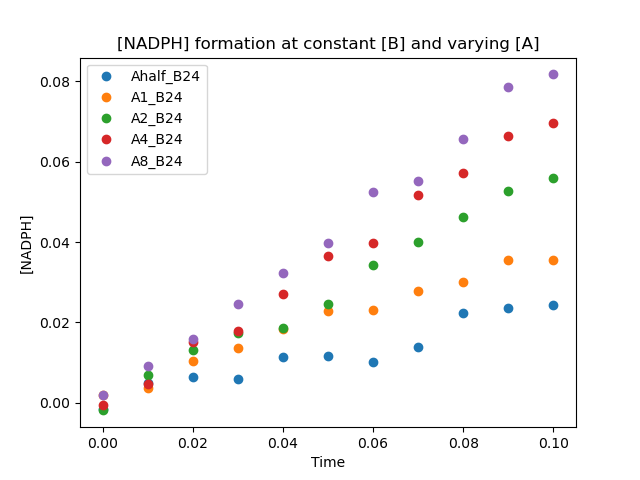

In [4]:
fig, ax = plt.subplots()
ax.plot(Ahalf_B24.Time, Ahalf_B24.NADPH, 'o', label='Ahalf_B24')
ax.plot(A1_B24.Time, A1_B24.NADPH, 'o', label='A1_B24')
ax.plot(A2_B24.Time, A2_B24.NADPH, 'o', label='A2_B24')
ax.plot(A4_B24.Time, A4_B24.NADPH, 'o', label='A4_B24')
ax.plot(A8_B24.Time, A8_B24.NADPH, 'o', label='A8_B24')
ax.set_xlabel('Time')
ax.set_ylabel('[NADPH]')
ax.legend(loc='best')
ax.set_title('[NADPH] formation at constant [B] and varying [A]')

In [5]:
A8_Bonehalf = pd.read_csv('A8B1.5.csv', names=['Time', 'NADPH'])
A8_B3 = pd.read_csv('A8B3.csv',  names=['Time', 'NADPH'])
A8_B6 = pd.read_csv('A8B6.csv', names=['Time', 'NADPH'])
A8_B12 = pd.read_csv('A8B12.csv', names=['Time', 'NADPH'])
A8_B24 = pd.read_csv('A8B24.csv', names=['Time', 'NADPH'])

Text(0.5, 1.0, '[NADPH] formation at constant [A] and varying [B]')

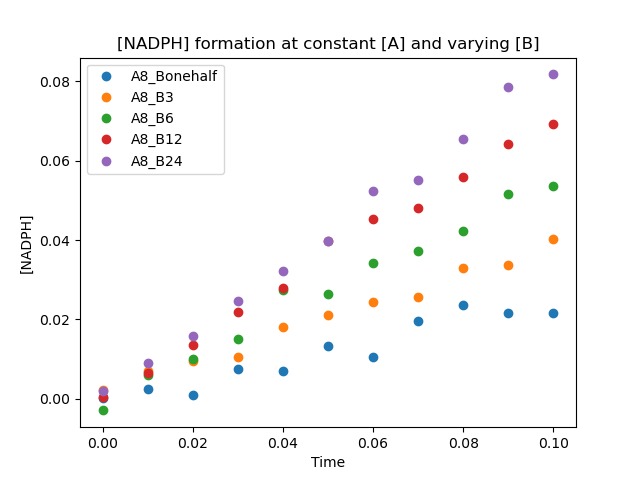

In [6]:
fig, ax = plt.subplots()
ax.plot(A8_Bonehalf.Time, A8_Bonehalf.NADPH, 'o', label='A8_Bonehalf')
ax.plot(A8_B3.Time, A8_B3.NADPH, 'o', label='A8_B3')
ax.plot(A8_B6.Time, A8_B6.NADPH, 'o', label='A8_B6')
ax.plot(A8_B12 .Time, A8_B12.NADPH, 'o', label='A8_B12')
ax.plot(A8_B24.Time, A8_B24.NADPH, 'o', label='A8_B24')
ax.set_xlabel('Time')
ax.set_ylabel('[NADPH]')
ax.legend(loc='best')
ax.set_title('[NADPH] formation at constant [A] and varying [B]')

In [7]:
regA0_B0 = sp.stats.linregress(A0_B0)
reg_Ahalf_B24 = sp.stats.linregress(Ahalf_B24)
regA1_B24 = sp.stats.linregress(A1_B24)
regA2_B24 = sp.stats.linregress(A2_B24)
regA4_B24 = sp.stats.linregress(A4_B24)
regA8_Bonehalf = sp.stats.linregress(A8_Bonehalf)
regA8_B3 = sp.stats.linregress(A8_B3)
regA8_B6 = sp.stats.linregress(A8_B6)
regA8_B12 = sp.stats.linregress(A8_B12)
regA8_B24 = sp.stats.linregress(A8_B24)

In [8]:
regressions = [regA0_B0, reg_Ahalf_B24, regA1_B24, regA2_B24, regA4_B24, regA8_Bonehalf, regA8_B3, regA8_B6, regA8_B12, regA8_B24]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.004954646341627726
0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761
0.8250788434733143


In [9]:
A = np.array([0, 0.5, 1, 2, 4, 8, 8, 8, 8, 8])
B = np.array([0, 24, 24, 24, 24, 1.5, 3, 6, 12, 24])

In [10]:
combine = pd.DataFrame({'concA': A, 'concB': B, 'rate': rates})
combine

concA  concB      rate
0    0.0    0.0  0.004955
1    0.5   24.0  0.241187
2    1.0   24.0  0.352630
3    2.0   24.0  0.574650
4    4.0   24.0  0.732286
5    8.0    1.5  0.254221
6    8.0    3.0  0.367954
7    8.0    6.0  0.556409
8    8.0   12.0  0.701204
9    8.0   24.0  0.825079

In [11]:
def v(Vf, a, b, Ka, Kb):
    return (Vf*a*b)/((Ka + a)*(Kb + b))

In [17]:
from lmfit import Model
mymod = Model(v, independent_vars = ['a', 'b'])
mypar  = mymod.make_params(Vf=1, Ka=1, Kb=1)
myfit = mymod.fit(combine.rate, mypar, a = combine.concA, b= combine.concB)
myfit

In [13]:
#Vf = 1.20594964 mM/s +- 0.04570438 
#Ka = 1.61269234 +- 0.13567971
#Kb = 4.89874506 +- 0.41256005

Text(0.5, 1.0, 'rate (mM/s) vs [A] and fixed [B]')

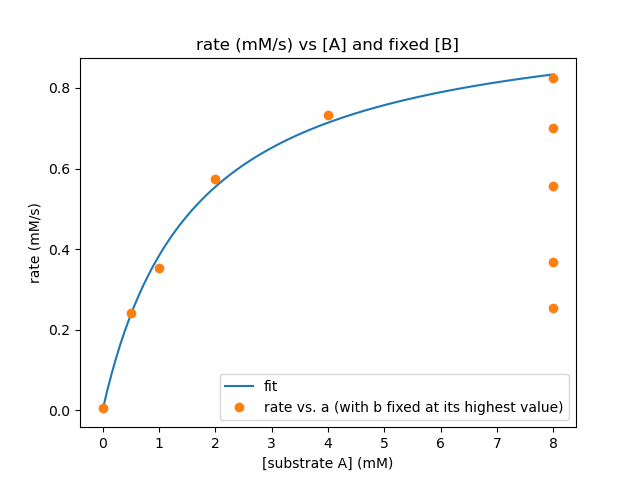

In [28]:
svalsa = np.linspace(0,8,101)
fig, ax = plt.subplots()
ax.plot(svalsa, myfit.eval(a=svalsa, b=24), label= 'fit')# gebruik die svals en sit in die oorspronklike vergelyk
ax.plot(combine.concA, combine.rate, 'o', label= 'rate vs. a (with b fixed at its highest value)')
ax.set_xlabel('[substrate A] (mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')
ax.set_title('rate (mM/s) vs [A] and fixed [B]')

Text(0.5, 1.0, 'rate (mM/s) vs [B] and fixed [A]')

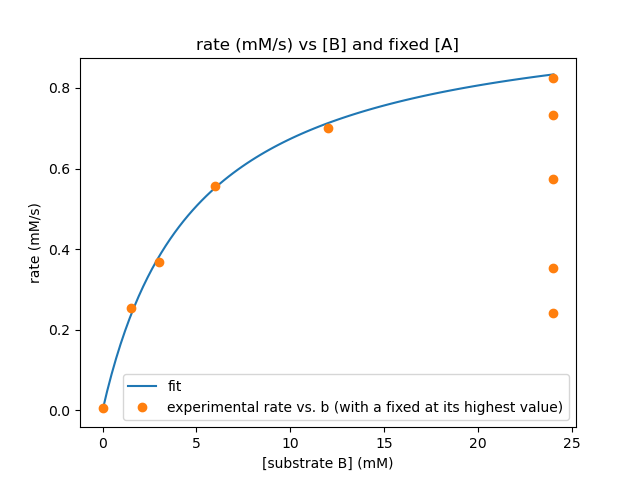

In [20]:
svalsb = np.linspace(0,24,101)
fig, ax = plt.subplots()
ax.plot(svalsb, myfit.eval(a=8, b=svalsb), label= 'fit')# gebruik die svals en sit in die oorspronklike vergelyk
ax.plot(combine.concB, combine.rate, 'o', label= 'experimental rate vs. b (with a fixed at its highest value)')
ax.set_xlabel('[substrate] (mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')
ax.set_title('rate (mM/s) vs [B] and fixed [A]')

In [24]:
combine.concA[combine.concB==24]

1    0.5
2    1.0
3    2.0
4    4.0
9    8.0
Name: concA, dtype: float64

In [21]:
combine[combine.concA==8]

concA  concB      rate
5    8.0    1.5  0.254221
6    8.0    3.0  0.367954
7    8.0    6.0  0.556409
8    8.0   12.0  0.701204
9    8.0   24.0  0.825079